# Исследование надежности заемщиков.

Требуется провести исследование надежности заемщиков.
Влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы,
которая оценивает способность потенциального заёмщика вернуть кредит банку.

Требуется ответить на такие вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv('/datasets/data.csv')

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Как можно увидеть данные стажа указаны чаще всего отрицательные, иногда, присутсвуют значения явно превышающие срок жизни человека. Так же видно повторение одинаковых значений в столбце образования, подозреваем что имеются неявные дубликаты. Больше никакие столбцы, на первый взгляд, не вызывают подозрений.

In [4]:
#Изучим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


* Количество пропущенных значений одинаковое.
* Типы данных на первый взгляд отлично расставлены.
* Нарушений стиля нет
Можно приступать к проверке/подготовке данных, найдем  и оценим пропуски, дубликаты...

In [5]:
#Проверка на пропуски в данных
data[data['days_employed'].isna()==True].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [6]:
print('Пропуски занимают: {:,.1%}'.format(len(data[data['days_employed'].isna()==True])/len(data)))

Пропуски занимают: 10.1%


In [7]:
data[data['days_employed']>0]['days_employed'].count()#количество положительных значений стажа

3445

Количество пропусков высокое, но они не препятствуют продолжению нашего анализа, ведь они присутвуют в двух столбцах, один из которых не участвует в исследовании. Относительно пропусков ежемесячного дохода, конечно, 10% повлияют на наше исследование, но этот столбец для нас второстепенный.

### Шаг 2.1 Заполнение пропусков

In [8]:
#data['total_income'] = data['total_income'].fillna(data['total_income'].mean())
#data['days_employed'] = data['days_employed'].fillna(data['days_employed'].mean())
#Чтобы не копипастить можно написать так
for i in ['days_employed','total_income']:
    data[i] = data[i].fillna(data[i].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Пропуски устранены и теперь можно рассмотреть более детально наши данные

### Шаг 2.2 Проверка данных на аномалии и исправления.

Проверим столбец Стаж, в котором находились интересные значения и исправим их.

Для этого напишем функцию проверки возможности существования стажа, тк имеется подозрение, что некоторые значения стажа указаны не в своем формате(в часах, а не днях). 

In [10]:
def employed(row):
    if row['days_employed']>(row['dob_years']*365):
        return row['days_employed']/24
    return row['days_employed']
#Функция перевода выделяющихся положительных значений
data['days_employed'] = abs(data['days_employed'])
data['days_employed'] = data.apply(employed, axis=1)

In [11]:
print('Стаж равный 340266.072047 теперь реалистичнее', data.loc[4,'days_employed'])

Стаж равный 340266.072047 теперь реалистичнее 14177.753001950914


В данных превалировали отрицательные значения и имеются выделяющиеся значения, но для конкретной задачи нам не требуется затрагивать данный столбец, но основные действия с ним можно произвести. Есть вероятность, что некоторые данные могут быть записаны в часах, а не днях.
Поэтому возьмем абсолютные значения, сравниваем значения с возрастом клиента в днях, домножив на 365, и если же стаж превышает, то разделим его на 24, получив цифру в днях.

In [12]:
#Проверка всех остальных столбцов на аномалии
for column in ['children','education','education_id','family_status','family_status_id','gender','income_type','debt','purpose']:
    print(data[column].value_counts())
    print()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

F      14236
M       7288
XN

Как можно заметить у нас присутвуют интересные значения в столбцах children и gender. В первом столбце вероятнее всего были допущены ошибки при заполнение данных клиентом и их количество не столь критичное, поэтому можно предположить и исправить эти значения. А вот одно значения в столбце gender похожее на техническую ошибку и является единственным, поэтому удалим его.

In [13]:
data['children'] = data['children'].replace(20,2) # Замена вероятной описки 20 детей на 2
data['children'] = data['children'].replace(-1,1) # Замена возможной описки -1 ребенок на 1, т.к. их доля мала
data = data.drop(data[data['gender']=='XNA'].index).reset_index(drop=True) #Удаление строчки с полом XNA

### Шаг 2.3. Изменение типов данных.

In [14]:
#Для удобства работы с доходом обрежем часть после запятой
data['total_income'] = data['total_income'].astype('int')

In [15]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Так гораздо удобнее воспринимать зарплаты, которые итак могут состоять более чем из 6 цифр.

### Шаг 2.4. Удаление дубликатов.
Перейдем к дубликатам, которые мы обнаружили в столбце образования

Найдем явные и неявные дубликаты

In [16]:
#Для поиска явных дубликатов имеется функция duplicated и его функция удаления явных дубликатов drop_duplicates
data = data.drop_duplicates().reset_index(drop=True) #удаление дубликатов и восстановление индексов

In [17]:
data['education'] = data['education'].str.lower()# перевод к единому нижнему регистру
data['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

Неявные дубликаты в столбце образование легко убрались при помощи приведения всех значений к одному регистру.

Другой вопрос, откуда появились явные дубликаты можно предположить, что они появились благодаря замене на средние значения, тк там были пропущенные данные, которые могли быть вызваны технической проблемой

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.
В таблице имеются столбцы, которые захламляют наш датафрейм

In [18]:
#Создаем словари с идентификаторами, чтобы не захламлять основной датафрейм
education_dict = data[['education_id','education']]
family_status_dict = data[['family_status_id','family_status']]

In [19]:
data = data.drop(['education','family_status'], axis=1) #удалили 2 столбца из оригинального датафрейма

In [20]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21470 entries, 0 to 21469
Data columns (total 10 columns):
children            21470 non-null int64
days_employed       21470 non-null float64
dob_years           21470 non-null int64
education_id        21470 non-null int64
family_status_id    21470 non-null int64
gender              21470 non-null object
income_type         21470 non-null object
debt                21470 non-null int64
total_income        21470 non-null int64
purpose             21470 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 1.6+ MB


Удалили дублирующие столбцы, оставив только столбцы ID для этих категорий

### Шаг 2.6. Категоризация дохода.
Одна из задач заключается в категоризации дохода, переходим к ее решению

In [21]:
#Для удобства использования и быстродействия создаем функцию, чтобы избежать перебора в цикле
def category_income(income):
    if (income>=0 and income<=30000):
        return 'E'
    if (income>=30001 and income<=50000):
        return 'D'
    if (income>=50001 and income<=200000):
        return 'C'
    if (income>=200001 and income<=1000000):
        return 'B'
    if income>=1000001:
        return 'A'

In [22]:
# Создание нового столбца и применение к нему функции категоризации дохода
data['total_income_category'] = data['total_income'].apply(category_income)

In [23]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

In [24]:
#Напишем функцию категоризации целей кредита
def category_purpose(purpose):
    try:
        if 'свадьб' in purpose:
            return 'проведение свадьбы'
        if 'жил' in purpose or 'недвижим' in purpose:
            return 'операции с недвижимостью'
        if 'автомоб' in purpose:
            return 'операции с автомобилем'
        if 'образован' in purpose:
            return 'получение образования'
    except:
        return 'Неопределена'

In [25]:
data['purpose_category'] = data['purpose'].apply(category_purpose)

In [26]:
data['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

Как можно заметить по уникальным значениям у нас отсутвуют проблемы с новым столбцем и функция прекрасно отрабатывается и на случай новых строк предусмотрена конструкция защиты.

Обработка данных завершена успешно. Можно приступать к работе с данными и проверке гипотез о взаимосвязях.

### Ответы на вопросы.

Интересующие нас вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [27]:
#Посчитаем процент задолженности в зависимотси от количества детей
pivot = pd.pivot_table(data=data,index='children',values='debt')
pivot['debt'] = round(pivot['debt']*100,2)# округление для восприятия
pivot

,debt
children,
0,7.54
1,9.16
2,9.49
3,8.18
4,9.76
5,0.00


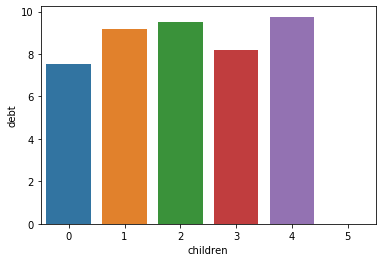

In [28]:
seaborn.barplot(x=pivot.index,y=pivot['debt'])

##### Вывод 1: 
Как видно из графика имеется тенденция увеличения процента задолженностей с возрастанием количества детей в семье, без учета семей с 5 детьми, т.к. в нашей выборке количество таких наблюдений крайне мало(9). Взаимосвязь количества детей и возвратом кредита в срок имеет место быть, но окончательно оценить ее влияние тяжело, потому что основная доля наблюдений приходится на семьи от 0 до 2 детей.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
pivot = pd.pivot_table(data=data,index='family_status_id',values='debt')
pivot['debt'] = round(pivot['debt']*100,2)
pivot

,debt
family_status_id,
0,7.54
1,9.32
2,6.57
3,7.11
4,9.75


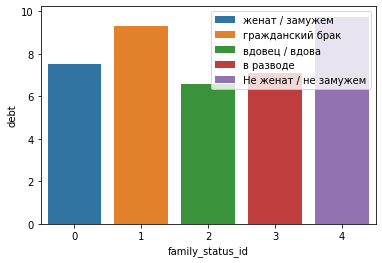

In [30]:
seaborn.barplot(x=pivot.index,y=pivot['debt'],hue=family_status_dict['family_status'].unique(),dodge=False)

##### Вывод 2:
Самый низкий процент появления задолженности по кредиту имеют взаимосвязанные группы вдовец/вдова и в разводе. Из графика видно, что люди не состоящие в браке чаще имеют задолженость. Можно утверждать, что семейное положение положительно сказывается на возврат кредита в срок, нежели отсутвие брака 

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
pivot = pd.pivot_table(data=data,index='total_income_category',values='debt')
pivot['debt'] = round(pivot['debt']*100,2)
pivot

,debt
total_income_category,
A,8.00
B,7.06
C,8.48
D,6.00
E,9.09


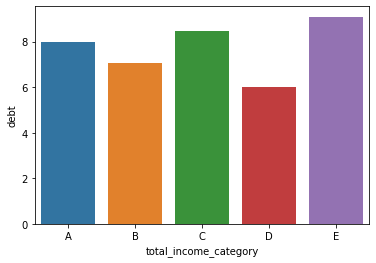

In [32]:
seaborn.barplot(x=pivot.index,y=pivot['debt'])

##### Вывод 3:
Имеется взаимосвязь между уровнем дохода и возвратом кредита в срок, самый низкий показатель возникновения задолженности у группы D. В то время как у остальных показатель не сильно отличается.

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [33]:
pivot = pd.pivot_table(data=data,index='purpose_category',values='debt')
pivot['debt'] = round(pivot['debt']*100,2)
pivot

,debt
purpose_category,
операции с автомобилем,9.35
операции с недвижимостью,7.23
получение образования,9.22
проведение свадьбы,7.97


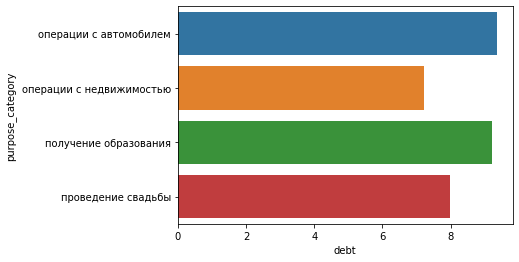

In [34]:
seaborn.barplot(y=pivot.index,x=pivot['debt'])

##### Вывод 4:
Как можно заметить возвращают в срок заемные средства люди, которые брали их на операции с недвижимостью и проведение свадьбы.

## Итоговый вывод:

В ходе исследования были выявлены и подтверждены требуемые взаимосвязи.
1. Имеется прямая взаимосвязь между количеством детей и возвращение кредита в срок

Но полное подтверждение гипотезы возможно, только с уточнением данных о семьях с более 4 детьми, тк присутствовали пропуски и процент таких семей в нашей выборке мал.

2. Семейное положение имеет связь с возвратом кредита в срок

Процент образования задолженности наивысший у заемщиков, которые не были в браке. С другой стороны, наименьший процент у заемщиков, состоявщих в браке, но лишившихся его по разным причинам.

3. Связь уровня доходов с возврщаением кредита отчасти присутсвует.

Т.к. в данном столбце были пропущенные значения, невозможно полностью подтвердить гипотезу о взаимосвязи, тк на других данных она может измениться.

4. Цели кредита явно имеют связь с возвратом средств в срок
Видно, что кредит на свадьбу и недвижимость возращают чаще в срок, чем остальное

**Исходя из полученных данных,** при выдаче кредита следует учитывать его семейное положение и количество детей, хорошими кандидатами были бы люди в разводе и без детей. Что касается уровня дохода, однозначно такие уровни дохода, как A и E повысят шанс просрочек по кредиту, так же самая благоприятная цель кредитования будет операция с недвижимостью.